## Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

## Funcoes Utilizadas

In [10]:
#Funcao simples que mostra uma imagem na tela
def show_img(image):
    plt.figure()
    plt.imshow(image)

    

def img_to_grey(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)


def bin_otsu(imagem):
    return cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

def gaussian_blur(imagem):
    value = (35, 35)
    return cv2.GaussianBlur(imagem, value, 0)

def find_contorn(img_bin):
    contours = ""
    (version, _, _) = cv2.__version__.split('.')
    if version == '3':
        image, contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #Estamos caindo aqui
    elif version == '2' or version == '4':
        contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    cnt = max(contours, key = lambda x: cv2.contourArea(x))
    return cnt

def find_img_contorn(imagem, contorn):
    return cv2.drawContours(imagem.copy(), [contorn], 0, (0, 255, 0), 3)

def create_rectangle(imagem, cnt):
    x, y, w, h = cv2.boundingRect(cnt)
    return cv2.rectangle(imagem, (x,y), (x+w, y+h), (0, 0, 255), 3)

def contorn_convexo(imagem, cnt):
    hull = cv2.convexHull(cnt)
    #cv2.imwrite('res3.png', imagem)
    return cv2.drawContours(imagem, [hull], 0, (0, 0, 255), 3)

def get_only_centr_img(imagem, cnt):
    moments = cv2.moments(cnt)
    if(moments['m00'] != 0):
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])

    centr = (cx, cy)
    #return cv2.circle(imagem, centr, 5, [0, 0, 255], 2)
    return centr

def get_centr_img(imagem, cnt):
    moments = cv2.moments(cnt)
    if(moments['m00'] != 0):
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])

    centr = (cx, cy)
    return cv2.circle(imagem, centr, 5, [0, 0, 255], 2)
    #return centr


def pre_process_img(imagem):
    img_grey = img_to_grey(imagem)
    img_gaus = gaussian_blur(img_grey)
    img_bin = bin_otsu(img_gaus)
    return img_bin

def show_img_draw(imagem):
    img_grey = img_to_grey(imagem)
    img_gaus = gaussian_blur(img_grey)
    img_bin = bin_otsu(img_gaus)
    contorno = find_contorn(img_bin)
    img_contorn = find_img_contorn(imagem.copy(), contorno)
    img_rect = create_rectangle(imagem.copy(), contorno)
    img_contorn = contorn_convexo(imagem.copy(), contorno)
    
    #Desenhando na imagem
    drawing = np.zeros(imagem.shape, np.uint8)
    centr_img = get_only_centr_img(imagem.copy(), contorno)
    hull = cv2.convexHull(contorno)
    x, y, w, h = cv2.boundingRect(contorno)
    drawing = np.zeros(imagem.shape, np.uint8)
    cv2.circle(drawing, centr_img, 5, [255, 0, 0], 10)
    cv2.drawContours(drawing, [contorno], 0, (0, 255, 0), 2)
    cv2.drawContours(drawing, [hull], 0, (0, 0, 255), 5)
    cv2.rectangle(drawing, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #show_img(drawing)
    return drawing
    
    
def conta_dedos_and_show_img_draw(imagem):
    img_grey = img_to_grey(imagem.copy())
    img_gaus = gaussian_blur(img_grey)
    img_bin = bin_otsu(img_gaus)
    contorno = find_contorn(img_bin)
    img_contorn = find_img_contorn(imagem.copy(), contorno)
    img_rect = create_rectangle(imagem.copy(), contorno)
    img_contorn = contorn_convexo(imagem.copy(), contorno)
    
    #Desenhando na imagem
    drawing = np.zeros(imagem.shape, np.uint8)
    centr_img = get_only_centr_img(imagem.copy(), contorno)
    hull = cv2.convexHull(contorno)
    x, y, w, h = cv2.boundingRect(contorno)
    drawing = np.zeros(imagem.shape, np.uint8)
    cv2.circle(drawing, centr_img, 5, [255, 0, 0], 10)
    cv2.drawContours(drawing, [contorno], 0, (0, 255, 0), 2)
    cv2.drawContours(drawing, [hull], 0, (0, 0, 255), 5)
    cv2.rectangle(drawing, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    #Conta Dedos
    hull_2 = cv2.convexHull(contorno, returnPoints = False)
    defects = cv2.convexityDefects(contorno, hull_2)
    imagem_copia = imagem.copy()
    cv2.circle(imagem_copia, centro, 3, [0,0,255], 6)
    qtd_dedos = 0
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]

        start = tuple(contorno[s][0])
        end = tuple(contorno[e][0])
        far = tuple(contorno[f][0])
        pt = (100, 180)

        #Encontrar o tamanho de todos os lados do triangulo
        a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
        b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
        c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)
        s = (a+b+c)/2
        ar = math.sqrt(s*(s-a)*(s-b)*(s-c))

        #Distancia entre o ponto e o convex hull
        d=(2*ar)/a

        angle = math.acos((b**2 + c**2 - a**2)/(2*b*c)) * 57
        if angle <= 90 and d>30:
            #print(angle)
            qtd_dedos += 1
            cv2.circle(imagem_copia, far, 3, [255,0,0], -1)
            
    qtd_dedos += 1
    
    print("Quantidade de dedos levantados: %d" %qtd_dedos)
    

def conta_dedos(imagem):
    img_grey = img_to_grey(imagem.copy())
    img_gaus = gaussian_blur(img_grey)
    img_bin = bin_otsu(img_gaus)
    contorno = find_contorn(img_bin)
    
    #Conta Dedos
    hull_2 = cv2.convexHull(contorno, returnPoints = False)
    defects = cv2.convexityDefects(contorno, hull_2)
    imagem_copia = imagem.copy()
    centro = get_only_centr_img(imagem.copy(), contorno)
    cv2.circle(imagem_copia, centro, 3, [0,0,255], 6)
    qtd_dedos = 0
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]

        start = tuple(contorno[s][0])
        end = tuple(contorno[e][0])
        far = tuple(contorno[f][0])
        pt = (100, 180)

        #Encontrar o tamanho de todos os lados do triangulo
        a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
        b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
        c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)
        s = (a+b+c)/2
        ar = math.sqrt(s*(s-a)*(s-b)*(s-c))

        #Distancia entre o ponto e o convex hull
        d=(2*ar)/a

        angle = math.acos((b**2 + c**2 - a**2)/(2*b*c)) * 57
        if angle <= 90 and d>30:
            #print(angle)
            qtd_dedos += 1
            cv2.circle(imagem_copia, far, 3, [255,0,0], -1)
            
    qtd_dedos += 1
    return qtd_dedos
    #print("Quantidade de dedos levantados: %d" %qtd_dedos)
    
def write_on_image(imagem, msg):
    #Escrevendo na img
    dimensions = imagem.shape
    height = dimensions[0]
    width = dimensions[1]
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    #cv2.putText(drawing, "Hello World", (0,50), font, 50, (255, 0,0))
    scale = 1
    font_size = min(width, height) / (350/scale)
    cv2.putText(imagem, str(msg), org=(0, height), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=font_size, color=(0, 255, 0),thickness=3)
    return imagem
    #show_img(drawing)


def img_pontos_convex(imagem):
    img_process = pre_process_img(imagem)
    #Passando a imagem binarizada para encontrar o contorno
    contorno = find_contorn(img_process)

    #Passando uma copia da imagem original para contornar
    img_contorn = find_img_contorn(imagem.copy(), contorno)

    #show_img(img_contorn)

    img_rect = create_rectangle(imagem.copy(), contorno)
    #show_img(img_rect)

    img_contorn = contorn_convexo(imagem.copy(), contorno)
    #show_img(img_contorn)
    #show_img(img_process)
    
    hull = cv2.convexHull(contorno, returnPoints = False)
    defects = cv2.convexityDefects(contorno, hull)

    imagem_copia = imagem.copy()
    #show_img(imagem_copia)
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]

        start = tuple(contorno[s][0])
        end = tuple(contorno[e][0])
        far = tuple(contorno[f][0])

        cv2.line(imagem_copia, start, end, [0, 255, 0], 3)
        cv2.circle(imagem_copia, far, 5, [255, 0, 0], -1)
    return imagem_copia


#EM DEV
def img_pontos_convex_dedos(imagem):
    img_process = pre_process_img(imagem)
    #Passando a imagem binarizada para encontrar o contorno
    contorno = find_contorn(img_process)

    #Passando uma copia da imagem original para contornar
    img_contorn = find_img_contorn(imagem.copy(), contorno)

    #show_img(img_contorn)

    img_rect = create_rectangle(imagem.copy(), contorno)
    #show_img(img_rect)

    img_contorn = contorn_convexo(imagem.copy(), contorno)
    #show_img(img_contorn)
    #show_img(img_process)
    
    hull = cv2.convexHull(contorno, returnPoints = False)
    defects = cv2.convexityDefects(contorno, hull)
    
    centr_img = get_only_centr_img(imagem.copy(), contorno)
    #print(centr_img)

    imagem_copia = imagem.copy()
    cv2.circle(imagem_copia, centr_img, 5, [0, 0, 255], -1)
    #show_img(imagem_copia)
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]

        start = tuple(contorno[s][0])
        end = tuple(contorno[e][0])
        far = tuple(contorno[f][0])
        ##########################################
        pt = (100, 180)

        #Encontrar o tamanho de todos os lados do triangulo
        a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
        b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
        c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)
        s = (a+b+c)/2
        ar = math.sqrt(s*(s-a)*(s-b)*(s-c))

        #Distancia entre o ponto e o convex hull
        d=(2*ar)/a

        angle = math.acos((b**2 + c**2 - a**2)/(2*b*c)) * 57
        #cv2.line(imagem_copia, start, end, [0, 255, 0], 3)
        
        distancia_centro = math.sqrt(((centr_img[0]-far[0])**2)+(centr_img[0]-far[0])**2)
        distancia = math.sqrt(distancia_centro)
        print(far, distancia, angle)
        if(distancia > 10 and distancia < 14 and angle > 134):
            cv2.circle(imagem_copia, far, 5, [255, 0, 0], -1)
            print(far, distancia, angle)
        show_img(imagem_copia)
        
        #if(angle > 130):
            #print(angle)
            #distancia_centro = math.sqrt(((centr_img[0]-far[0])**2)+(centr_img[0]-far[0])**2)
            #if(distancia_centro > 30):
                #print(distancia_centro)
                #cv2.circle(imagem_copia, far, 5, [255, 0, 0], -1)
                #cv2.line(imagem_copia, start, centr_img, [0, 255, 0], 3)
    return imagem_copia



(171, 166) 4.756828460010884 34.61496345617373
(108, 50) 10.569904040599162 134.30308594096368
(108, 50) 10.569904040599162 134.30308594096368
(102, 56) 10.963947865696602 145.55463285240694
(102, 56) 10.963947865696602 145.55463285240694
(133, 224) 8.738851890731821 61.67080643062747
(34, 204) 14.709679637676803 134.30308594096368
(143, 332) 7.888307596970099 129.366682370032
(229, 365) 7.706942949034331 163.01681058112567
(259, 313) 10.090756983044574 148.26686973919493
(259, 313) 10.090756983044574 148.26686973919493
(278, 216) 11.344312856050456 158.18407998883183
(278, 216) 11.344312856050456 158.18407998883183
(327, 132) 14.070888341971637 152.6428675415723
(328, 119) 14.121052095881751 152.6428675415723
(245, 190) 9.056731563739731 38.54681354902022
(260, 48) 10.160590044541504 134.30308594096368
(260, 48) 10.160590044541504 134.30308594096368
(211, 165) 5.825901260487881 27.74293272054427
(195, 26) 3.3635856610148585 134.30308594096368


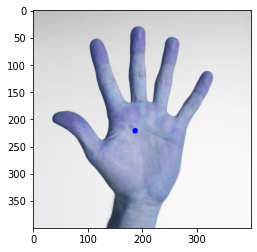

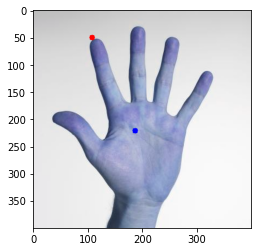

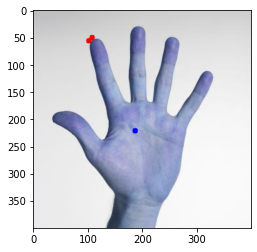

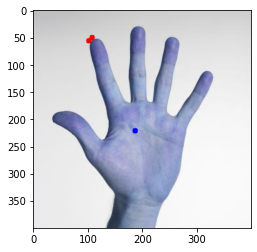

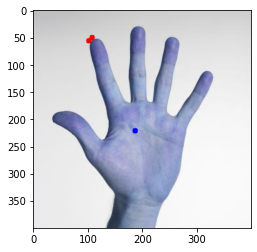

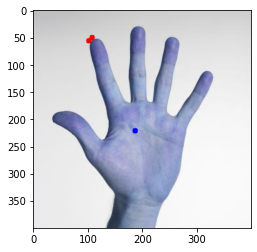

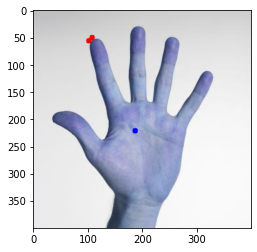

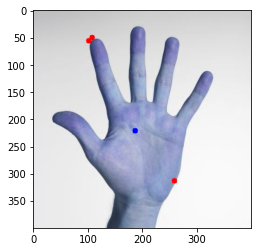

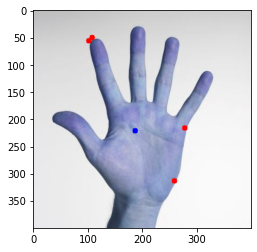

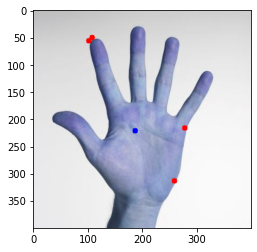

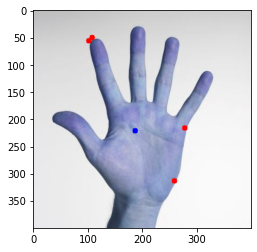

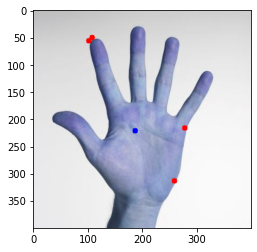

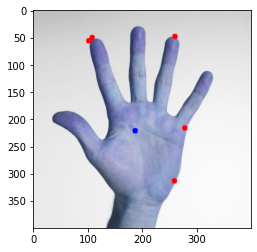

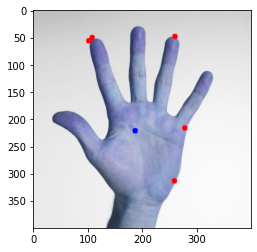

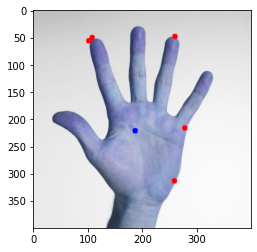

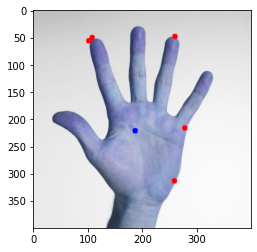

In [3]:
imagem_teste = "base1/mao5.jpg"
imagem = cv2.imread(imagem_teste)
img_convex = img_pontos_convex_dedos(imagem.copy())
show_img(img_convex)

## Imagem de teste

### Pré-Processamento

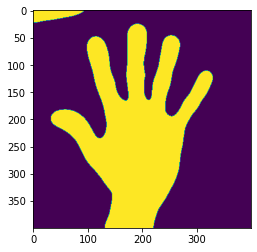

In [4]:
imagem_teste = "base1/mao5.jpg"
imagem = cv2.imread(imagem_teste)
#Aplicando binarizacao de OTSU
#_, thresh1 = cv2.theshold(grey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#show_img(imagem)

img_grey = img_to_grey(imagem)
#show_img(img_grey)

img_gaus = gaussian_blur(img_grey)
#show_img(img_gaus)

img_bin = bin_otsu(img_gaus)
show_img(img_bin)


### Contorno

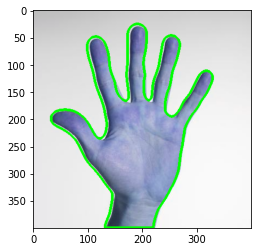

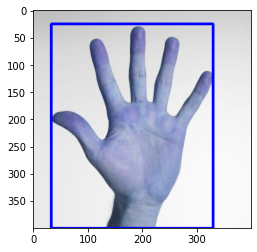

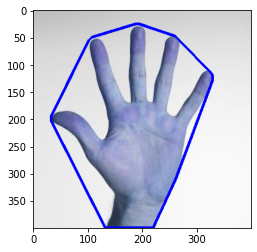

In [5]:
#Passando a imagem binarizada para encontrar o contorno
contorno = find_contorn(img_bin)

#Passando uma copia da imagem original para contornar
img_contorn = find_img_contorn(imagem.copy(), contorno)

show_img(img_contorn)

img_rect = create_rectangle(imagem.copy(), contorno)
show_img(img_rect)

img_contorn = contorn_convexo(imagem.copy(), contorno)
show_img(img_contorn)

### Centro

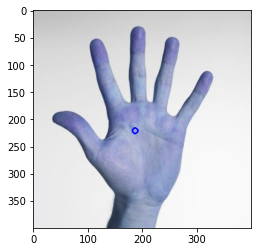

In [6]:
centr_img = get_centr_img(imagem.copy(), contorno)
show_img(centr_img)

### Visualizando

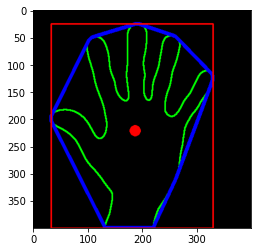

In [7]:
img_draw = show_img_draw(imagem.copy())
show_img(img_draw)

### Defeitos no Convex

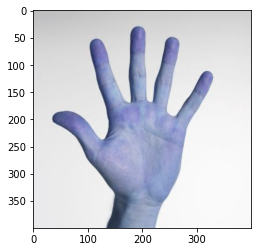

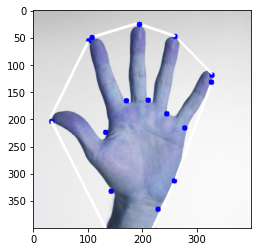

In [8]:
hull = cv2.convexHull(contorno, returnPoints = False)
defects = cv2.convexityDefects(contorno, hull)

imagem_copia = imagem.copy()
show_img(imagem_copia)
for i in range(defects.shape[0]):
    s, e, f, d = defects[i, 0]
    
    start = tuple(contorno[s][0])
    end = tuple(contorno[e][0])
    far = tuple(contorno[f][0])
    
    cv2.line(imagem_copia, start, end, [255, 255, 255], 3)
    cv2.circle(imagem_copia, far, 5, [0, 0, 255], -1)
    
show_img(imagem_copia)

## Realizando testes na base de dados 1

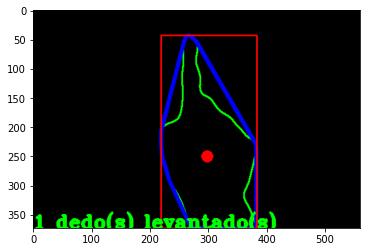

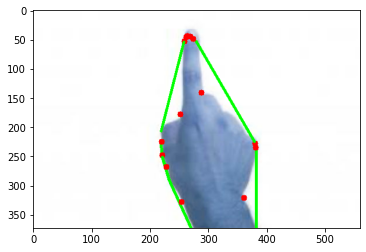

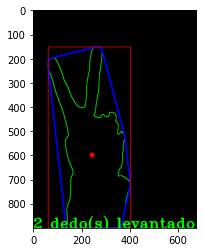

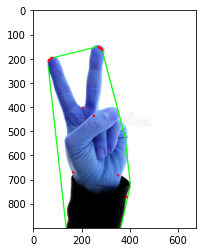

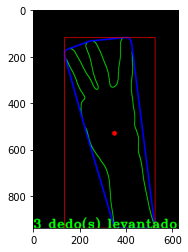

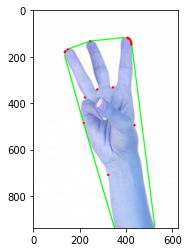

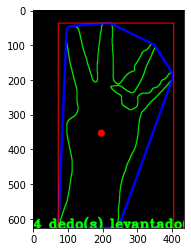

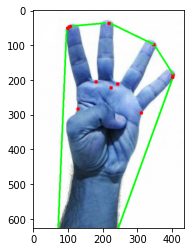

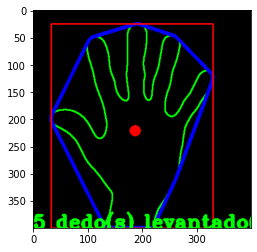

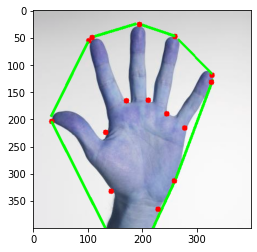

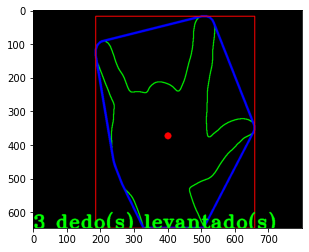

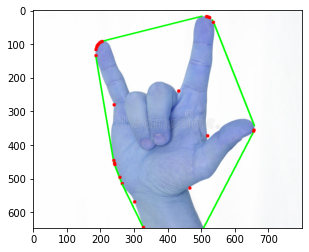

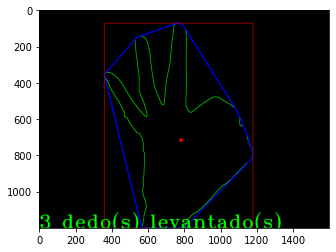

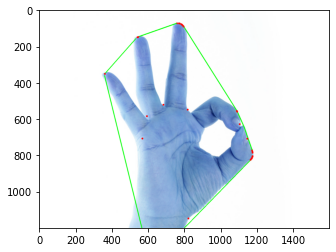

In [11]:
base_1 = ["base1/mao1.jpg", "base1/mao2.jpg", "base1/mao3.jpg", "base1/mao4.jpg", "base1/mao5.jpg", 
        "base1/mao6.jpg","base1/mao7.jpg"]

for img in base_1:
    imagem = cv2.imread(img)
    img_draw = show_img_draw(imagem.copy())
    qtd_dedos_levant = conta_dedos(imagem.copy())
    new_img = write_on_image(img_draw, str(qtd_dedos_levant) + (" dedo(s) levantado(s)"))
    show_img(new_img)
    
    img_convex = img_pontos_convex(imagem.copy())
    show_img(img_convex)

## Realizando teste no vídeo do alfabeto em libras

In [ ]:
cap = cv2.VideoCapture('alfabeto_libras.mp4')

if(cap.isOpened() == False):
    print("Erro ao abrir video")
    
while(cap.isOpened()):
    ret, frame = cap.read()
    if(ret == True):
        cv2.im